<a href="https://colab.research.google.com/github/nirmalghimire/MMTEC_prediction/blob/main/MMTec_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project focuses on forecasting the future stock prices of MMTec. It leverages historical stock price data, utilizing both ARIMA and LSTM models to predict potential price trends over different time horizons. The data is sourced from a CSV file named "MTC.csv," containing daily stock prices with attributes like 'Date,' 'Open,' 'High,' 'Low,' 'Close,' 'Adj Close,' and 'Volume.'

The initial steps involve mounting Google Drive to access the dataset and importing essential libraries such as Keras, NumPy, Pandas, and Matplotlib. The dataset is then loaded, and the 'Date' column is converted to datetime format and set as the index for time series analysis.

The 'Close' prices are extracted and normalized using MinMaxScaler to prepare the data for the LSTM model. The dataset is split into training and testing sets, with 80% allocated for training and 20% for testing.

An ARIMA model is fitted to the training data, and predictions are made for one week, one month, and six months ahead. The results are plotted, showcasing the training data, test data, and the forecasted values for each time horizon.

The program proceeds to build an LSTM model for forecasting. It defines a function to create datasets for training and testing, reshapes the input data, and constructs the LSTM model with specified layers and an Adam optimizer. The model is trained on the training data, and predictions are made for the same time horizons as the ARIMA model.

The LSTM predictions are then inverse transformed to their original scale, and the results are plotted alongside the training and test data. The plot illustrates the actual stock prices and the forecasted values using the LSTM model.

In the subsequent sections, the code refines the data preprocessing and model building steps. It normalizes the entire dataset, splits it into training and testing sets, and creates datasets for the LSTM model. The LSTM model is rebuilt and trained, and predictions are made for the specified time horizons.

Finally, the code generates a plot displaying the actual stock prices and the LSTM model's predictions for one week, one month, and six months. The plot provides a visual representation of the model's performance in forecasting future stock prices.

This code mounts the user's Google Drive to the Colab environment, allowing access to files stored in the drive.

In [1]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This code installs the TensorFlow library, a popular machine learning framework used for building and training various types of neural networks, including the LSTM model used later in the project for stock price prediction.

In [2]:
# Import necessary library
!pip install tensorflow

Import various libraries commonly used in time series analysis and deep learning tasks:

In [3]:
# Load Required Libraries
from keras.models import Sequential # Imports the Sequential model from the Keras library, which is commonly used for building deep learning models layer by layer
from keras.layers import LSTM, Dense # Imports the LSTM (Long Short-Term Memory) layer and Dense layer from Keras. LSTM is a type of recurrent neural network (RNN) architecture often used for sequence prediction tasks, while Dense represents a fully connected layer in a neural network
from keras.optimizers import Adam # Imports the Adam optimizer from Keras, which is a popular optimization algorithm commonly used for training deep learning models
import numpy as np # Imports the NumPy library, which is widely used for numerical computations in Python. It provides support for arrays, matrices, and mathematical functions
import pandas as pd # Imports the Pandas library, which is commonly used for data manipulation and analysis in Python. It provides data structures like DataFrame for working with structured data efficiently
import matplotlib.pyplot as plt # Imports the Pyplot module from the Matplotlib library, which is used for creating visualizations such as plots and charts
from sklearn.preprocessing import MinMaxScaler # Imports the MinMaxScaler class from the scikit-learn library, which is used for scaling numerical input features to a specified range. This is often used in preprocessing data for machine learning models
from statsmodels.tsa.arima.model import ARIMA # Imports the ARIMA (AutoRegressive Integrated Moving Average) model from the statsmodels library, which is commonly used for time series forecasting and analysis
import matplotlib.pyplot as plt

Let's load the data from the CSV file located at '/content/drive/My Drive/MTC.csv' and display the first few rows to understand its structure.

In [4]:
# Load Data
file_path = '/content/drive/My Drive/MTC.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-05-24,0.805,0.810,0.785,0.790,0.790,70600
1,2023-05-25,0.790,0.801,0.730,0.744,0.744,124700
2,2023-05-26,0.730,0.767,0.712,0.730,0.730,113400
3,2023-05-30,0.723,0.790,0.723,0.732,0.732,186000
4,2023-05-31,0.720,0.770,0.720,0.756,0.756,33600


This code block performs several preprocessing steps on the dataset:

1. It converts the 'Date' column to datetime format and sets it as the index for the DataFrame.
2. It extracts the 'Close' price from the dataset.
3. It normalizes the 'Close' price using MinMaxScaler to scale it between 0 and 1, which is often beneficial for training neural network models like LSTM.
4. It splits the dataset into training and testing sets, with 80% of the data used for training and 20% for testing.

The final output of the code block provides tuples containing the training and testing datasets both in their original form (`train_data`, `test_data`) and normalized form (`scaled_train_data`, `scaled_test_data`).

In [5]:
# Convert 'Date' to datetime and set it as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Extract the 'Close' price
close_prices = data['Close']

# Normalize the 'Close' price for LSTM model
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close = scaler.fit_transform(close_prices.values.reshape(-1, 1))

# Split the data into training and testing sets (80% train, 20% test)
train_size = int(len(close_prices) * 0.8)
train_data, test_data = close_prices[:train_size], close_prices[train_size:]
scaled_train_data, scaled_test_data = scaled_close[:train_size], scaled_close[train_size:]

(train_data, test_data), (scaled_train_data, scaled_test_data)

((Date
  2023-05-24    0.790
  2023-05-25    0.744
  2023-05-26    0.730
  2023-05-30    0.732
  2023-05-31    0.756
                ...  
  2024-03-07    1.950
  2024-03-08    1.960
  2024-03-11    1.970
  2024-03-12    1.930
  2024-03-13    1.760
  Name: Close, Length: 202, dtype: float64,
  Date
  2024-03-14    1.5900
  2024-03-15    2.2000
  2024-03-18    1.9400
  2024-03-19    1.8900
  2024-03-20    1.9100
  2024-03-21    2.3000
  2024-03-22    2.2500
  2024-03-25    1.9300
  2024-03-26    1.8900
  2024-03-27    1.8600
  2024-03-28    1.8400
  2024-04-01    1.8700
  2024-04-02    1.7800
  2024-04-03    1.7000
  2024-04-04    1.7000
  2024-04-05    1.8200
  2024-04-08    1.8300
  2024-04-09    1.8000
  2024-04-10    1.7700
  2024-04-11    1.7900
  2024-04-12    1.7700
  2024-04-15    1.5700
  2024-04-16    1.6100
  2024-04-17    1.5700
  2024-04-18    1.7000
  2024-04-19    1.6200
  2024-04-22    1.5600
  2024-04-23    2.2400
  2024-04-24    3.6000
  2024-04-25    3.1500
  2024-04-

This code block fits an ARIMA (AutoRegressive Integrated Moving Average) model to the training data and then uses the fitted model to make forecasts for different time horizons: one week, one month, and six months into the future.

The forecasts are plotted along with the training and test data for visualization. Finally, the code block outputs the forecasts for each time horizon as tuples (`one_week_forecast`, `one_month_forecast`, `six_months_forecast`).

The `order=(5, 1, 0)` parameter in `ARIMA(train_data, order=(5, 1, 0))` denotes the ARIMA model's parameters: `(p, d, q)` where `p` is the autoregressive order, `d` is the differencing order, and `q` is the moving average order.

The forecasts are then plotted using Matplotlib, with each forecast horizon represented by a different color.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

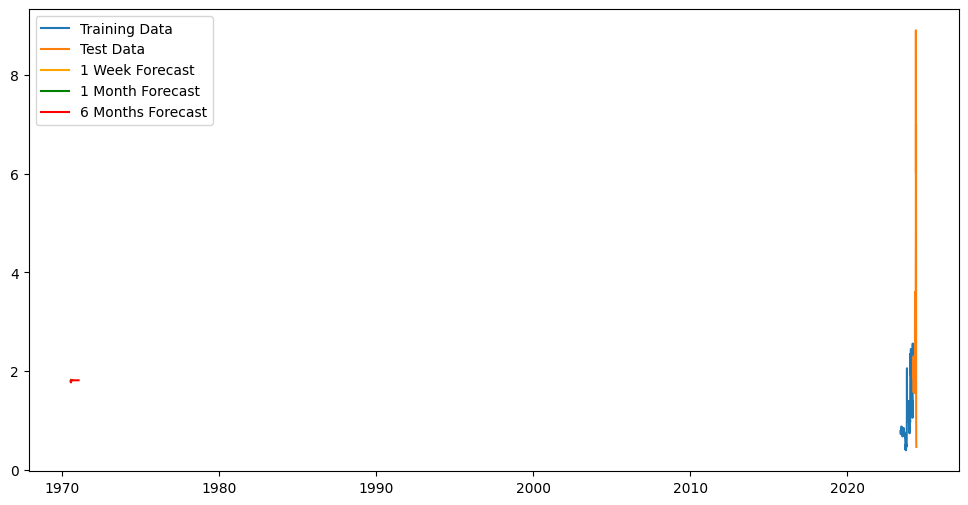

(202    1.797389
 203    1.777039
 204    1.789603
 205    1.810686
 206    1.822393
 207    1.822611
 208    1.823652
 Name: predicted_mean, dtype: float64,
 202    1.797389
 203    1.777039
 204    1.789603
 205    1.810686
 206    1.822393
 207    1.822611
 208    1.823652
 209    1.819601
 210    1.816528
 211    1.815158
 212    1.814866
 213    1.815214
 214    1.815950
 215    1.816404
 216    1.816608
 217    1.816610
 218    1.816498
 219    1.816376
 220    1.816304
 221    1.816279
 222    1.816289
 223    1.816313
 224    1.816334
 225    1.816344
 226    1.816346
 227    1.816343
 228    1.816338
 229    1.816335
 230    1.816334
 231    1.816334
 Name: predicted_mean, dtype: float64,
 202    1.797389
 203    1.777039
 204    1.789603
 205    1.810686
 206    1.822393
          ...   
 377    1.816336
 378    1.816336
 379    1.816336
 380    1.816336
 381    1.816336
 Name: predicted_mean, Length: 180, dtype: float64)

In [6]:
# Fit the ARIMA model
arima_model = ARIMA(train_data, order=(5, 1, 0))  # ARIMA parameters (p, d, q)
arima_fit = arima_model.fit()

# Predicting the next 1 week, 1 month, and 6 months
one_week_forecast = arima_fit.forecast(steps=7)
one_month_forecast = arima_fit.forecast(steps=30)
six_months_forecast = arima_fit.forecast(steps=180)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(one_week_forecast.index, one_week_forecast, label='1 Week Forecast', color='orange')
plt.plot(one_month_forecast.index, one_month_forecast, label='1 Month Forecast', color='green')
plt.plot(six_months_forecast.index, six_months_forecast, label='6 Months Forecast', color='red')
plt.legend()
plt.show()

(one_week_forecast, one_month_forecast, six_months_forecast)

This code block defines an LSTM (Long Short-Term Memory) model for time series forecasting. Here's what it does:

1. **Data Preprocessing**: It defines a function `create_dataset` to prepare the data for LSTM modeling by creating input-output pairs with a specified time step.
2. **Splitting Data**: It splits the scaled training and testing data into input-output pairs using the `create_dataset` function.
3. **Model Architecture**: It defines an LSTM model using Keras Sequential API with two LSTM layers followed by two Dense layers.
4. **Model Compilation**: It compiles the model using the Adam optimizer and mean squared error loss.
5. **Model Training**: It trains the model on the training data for a specified number of epochs and batch size.
6. **Prediction Function**: It defines a function `predict_future` to make future predictions using the trained model.
7. **Making Forecasts**: It generates forecasts for one week, one month, and six months into the future using the `predict_future` function.
8. **Inverse Scaling**: It inverse-scales the forecasted values to the original scale using the MinMaxScaler.
9. **Plotting**: It plots the training and test data along with the LSTM model forecasts for different forecast horizons using Matplotlib.

Overall, this code block demonstrates how to build, train, and utilize an LSTM model for time series forecasting, showcasing its capability to generate future predictions.

Epoch 1/10
191/191 - 10s - loss: 0.0020 - 10s/epoch - 53ms/step
Epoch 2/10
191/191 - 1s - loss: 0.0014 - 1s/epoch - 6ms/step
Epoch 3/10
191/191 - 1s - loss: 9.2177e-04 - 1s/epoch - 6ms/step
Epoch 4/10
191/191 - 1s - loss: 8.9223e-04 - 1s/epoch - 6ms/step
Epoch 5/10
191/191 - 1s - loss: 6.2799e-04 - 1s/epoch - 7ms/step
Epoch 6/10
191/191 - 1s - loss: 5.5638e-04 - 1s/epoch - 7ms/step
Epoch 7/10
191/191 - 1s - loss: 5.7003e-04 - 1s/epoch - 6ms/step
Epoch 8/10
191/191 - 2s - loss: 5.2668e-04 - 2s/epoch - 8ms/step
Epoch 9/10
191/191 - 2s - loss: 5.8516e-04 - 2s/epoch - 9ms/step
Epoch 10/10
191/191 - 2s - loss: 5.5358e-04 - 2s/epoch - 10ms/step


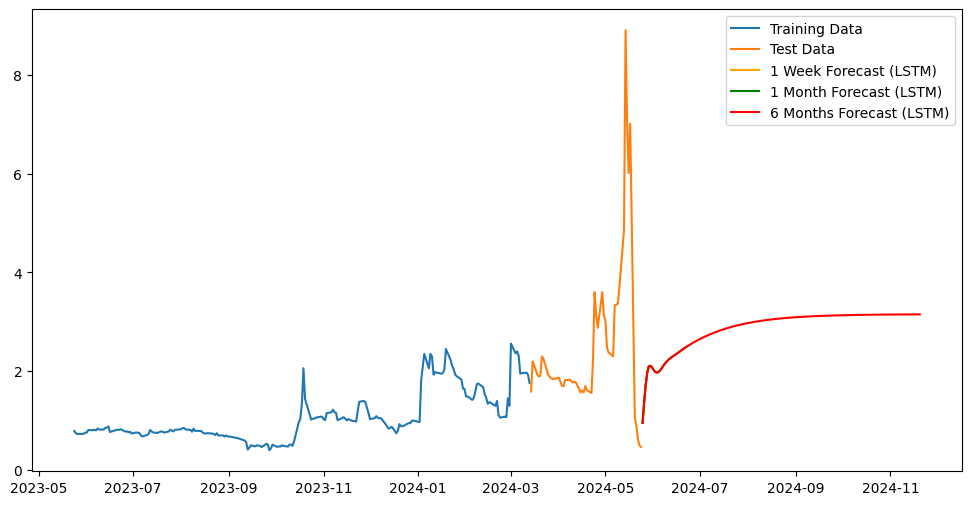

In [7]:
# LSTM Model
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 10
X_train, y_train = create_dataset(scaled_train_data, time_step)
X_test, y_test = create_dataset(scaled_test_data, time_step)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

model.fit(X_train, y_train, batch_size=1, epochs=10, verbose=2)

def predict_future(model, data, steps, time_step):
    predictions = []
    current_input = data[-time_step:]
    for _ in range(steps):
        current_input = current_input.reshape((1, time_step, 1))
        prediction = model.predict(current_input, verbose=0)
        predictions.append(prediction[0, 0])
        current_input = np.append(current_input[0][1:], prediction, axis=0)
    return np.array(predictions)

one_week_forecast_lstm = predict_future(model, scaled_test_data, 7, time_step)
one_month_forecast_lstm = predict_future(model, scaled_test_data, 30, time_step)
six_months_forecast_lstm = predict_future(model, scaled_test_data, 180, time_step)

one_week_forecast_lstm = scaler.inverse_transform(one_week_forecast_lstm.reshape(-1, 1))
one_month_forecast_lstm = scaler.inverse_transform(one_month_forecast_lstm.reshape(-1, 1))
six_months_forecast_lstm = scaler.inverse_transform(six_months_forecast_lstm.reshape(-1, 1))

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(test_data.index[-1] + pd.to_timedelta(np.arange(1, 8), unit='d'), one_week_forecast_lstm, label='1 Week Forecast (LSTM)', color='orange')
plt.plot(test_data.index[-1] + pd.to_timedelta(np.arange(1, 31), unit='d'), one_month_forecast_lstm, label='1 Month Forecast (LSTM)', color='green')
plt.plot(test_data.index[-1] + pd.to_timedelta(np.arange(1, 181), unit='d'), six_months_forecast_lstm, label='6 Months Forecast (LSTM)', color='red')
plt.legend()
plt.show()

This code block showcases the predictions generated by the LSTM model for different forecast horizons:

1. It generates forecasts for one week, one month, and six months into the future using the `predict_future` function.
2. The forecasted values are inverse-transformed to their original scale using the `scaler.inverse_transform` method.
3. Finally, it prints out the forecasts for each horizon.

The `flatten()` method is used to convert the forecasted arrays into one-dimensional arrays for better readability in the print statements.

In [8]:
# LSTM Model Predictions
# Ensure you have the predictions as shown below
one_week_forecast_lstm = predict_future(model, scaled_test_data, 7, time_step)
one_month_forecast_lstm = predict_future(model, scaled_test_data, 30, time_step)
six_months_forecast_lstm = predict_future(model, scaled_test_data, 180, time_step)

# Inverse transform the predictions
one_week_forecast_lstm = scaler.inverse_transform(one_week_forecast_lstm.reshape(-1, 1))
one_month_forecast_lstm = scaler.inverse_transform(one_month_forecast_lstm.reshape(-1, 1))
six_months_forecast_lstm = scaler.inverse_transform(six_months_forecast_lstm.reshape(-1, 1))

# Print the predictions
print("LSTM 1 Week Forecast:", one_week_forecast_lstm.flatten())
print("LSTM 1 Month Forecast:", one_month_forecast_lstm.flatten())
print("LSTM 6 Months Forecast:", six_months_forecast_lstm.flatten())

LSTM 1 Week Forecast: [0.9545964 1.3650928 1.7195129 1.9689584 2.0977168 2.1095612 2.082376 ]
LSTM 1 Month Forecast: [0.9545964 1.3650928 1.7195129 1.9689584 2.0977168 2.1095612 2.082376
 2.0338054 1.9921907 1.9720306 1.977871  2.004369  2.0444703 2.0902724
 2.1354299 2.176057  2.2108195 2.2400362 2.2651181 2.2877634 2.30945
 2.3311656 2.3533723 2.3761    2.3991108 2.422059  2.444619  2.4665546
 2.487744  2.5081658]
LSTM 6 Months Forecast: [0.9545964 1.3650928 1.7195129 1.9689584 2.0977168 2.1095612 2.082376
 2.0338054 1.9921907 1.9720306 1.977871  2.004369  2.0444703 2.0902724
 2.1354299 2.176057  2.2108195 2.2400362 2.2651181 2.2877634 2.30945
 2.3311656 2.3533723 2.3761    2.3991108 2.422059  2.444619  2.4665546
 2.487744  2.5081658 2.5278664 2.5469248 2.565424  2.5834303 2.6009867
 2.6181142 2.634817  2.651089  2.6669242 2.6823177 2.69727   2.7117867
 2.7258773 2.7395535 2.752828  2.7657127 2.7782192 2.7903576 2.802137
 2.813565  2.8246503 2.835401  2.845825  2.8559299 2.865724  2.

This code block plots the ARIMA model's predictions alongside the training and test data. It generates forecasts for one week, one month, and six months into the future, and plots them using different colors for clarity. The x-axis represents dates, while the y-axis represents close prices.

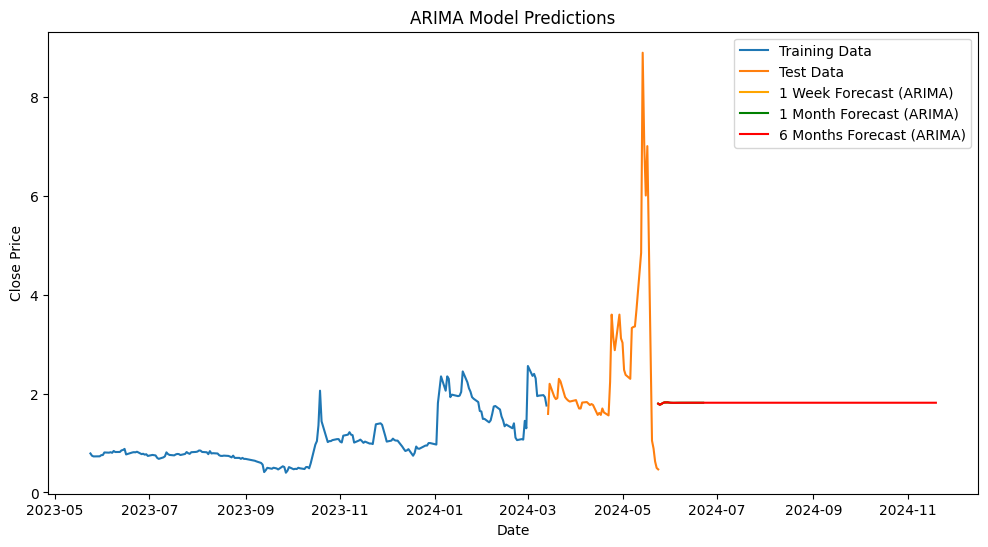

In [ ]:
# Plotting the ARIMA results
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(pd.date_range(start=test_data.index[-1], periods=7, freq='D'), one_week_forecast, label='1 Week Forecast (ARIMA)', color='orange')
plt.plot(pd.date_range(start=test_data.index[-1], periods=30, freq='D'), one_month_forecast, label='1 Month Forecast (ARIMA)', color='green')
plt.plot(pd.date_range(start=test_data.index[-1], periods=180, freq='D'), six_months_forecast, label='6 Months Forecast (ARIMA)', color='red')
plt.legend()
plt.title('ARIMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

This code block performs several tasks related to LSTM modeling and forecasting:

Normalization: It normalizes the 'Close' price data using MinMaxScaler to scale it between 0 and 1.
Data Splitting: It splits the normalized data into training and testing sets.
Data Preparation: It prepares the training and testing datasets by creating input-output pairs with a specified time step.
Model Building: It builds an LSTM model using Keras Sequential API with two LSTM layers followed by two Dense layers.
Model Training: It trains the LSTM model on the training data for a specified number of epochs and batch size.
Future Prediction: It defines a function to predict future values using the trained LSTM model.
Making Predictions: It generates forecasts for one week, one month, and six months into the future using the LSTM model.
Inverse Transformation: It inverse-transforms the forecasted values to the original scale using the MinMaxScaler.
Plotting: It plots the actual data along with the LSTM model's forecasts for different forecast horizons.

Epoch 1/10
191/191 - 8s - loss: 0.0015 - 8s/epoch - 40ms/step
Epoch 2/10
191/191 - 1s - loss: 0.0013 - 1s/epoch - 6ms/step
Epoch 3/10
191/191 - 1s - loss: 0.0010 - 1s/epoch - 7ms/step
Epoch 4/10
191/191 - 1s - loss: 7.5420e-04 - 1s/epoch - 6ms/step
Epoch 5/10
191/191 - 1s - loss: 7.8057e-04 - 1s/epoch - 6ms/step
Epoch 6/10
191/191 - 1s - loss: 5.5506e-04 - 1s/epoch - 6ms/step
Epoch 7/10
191/191 - 1s - loss: 5.3066e-04 - 1s/epoch - 7ms/step
Epoch 8/10
191/191 - 1s - loss: 5.7183e-04 - 1s/epoch - 7ms/step
Epoch 9/10
191/191 - 1s - loss: 5.5692e-04 - 1s/epoch - 7ms/step
Epoch 10/10
191/191 - 2s - loss: 5.3920e-04 - 2s/epoch - 10ms/step


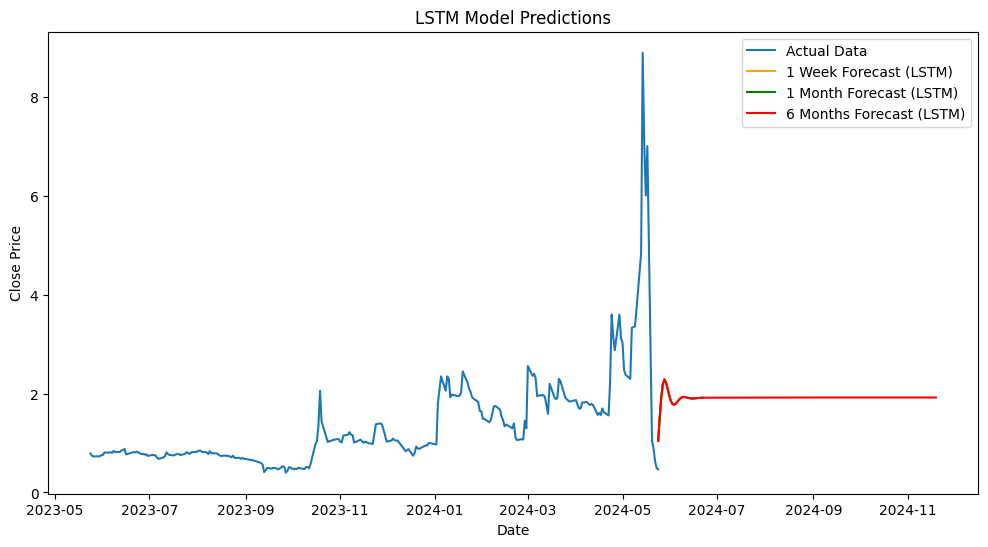

In [9]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Split data
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Create dataset
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=1, epochs=10, verbose=2)

# Predict future values
def predict_future(model, data, steps, time_step):
    predictions = []
    current_input = data[-time_step:]
    for _ in range(steps):
        current_input = current_input.reshape((1, time_step, 1))
        prediction = model.predict(current_input, verbose=0)
        predictions.append(prediction[0, 0])
        current_input = np.append(current_input[0][1:], prediction, axis=0)
    return np.array(predictions)

# Make predictions
one_week_forecast_lstm = predict_future(model, test_data, 7, time_step)
one_month_forecast_lstm = predict_future(model, test_data, 30, time_step)
six_months_forecast_lstm = predict_future(model, test_data, 180, time_step)

# Inverse transform the predictions
one_week_forecast_lstm = scaler.inverse_transform(one_week_forecast_lstm.reshape(-1, 1))
one_month_forecast_lstm = scaler.inverse_transform(one_month_forecast_lstm.reshape(-1, 1))
six_months_forecast_lstm = scaler.inverse_transform(six_months_forecast_lstm.reshape(-1, 1))

# Plot the predictions
last_date = data.index[-1]
future_dates_week = pd.date_range(last_date, periods=7, freq='D')
future_dates_month = pd.date_range(last_date, periods=30, freq='D')
future_dates_six_months = pd.date_range(last_date, periods=180, freq='D')

plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Actual Data')
plt.plot(future_dates_week, one_week_forecast_lstm, label='1 Week Forecast (LSTM)', color='orange')
plt.plot(future_dates_month, one_month_forecast_lstm, label='1 Month Forecast (LSTM)', color='green')
plt.plot(future_dates_six_months, six_months_forecast_lstm, label='6 Months Forecast (LSTM)', color='red')
plt.legend()
plt.title('LSTM Model Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

This code block prepares the LSTM model's predictions in a tabular format with padding to ensure consistent length across different forecast horizons. Here's what it does:

Normalization: It normalizes the 'Close' price data using MinMaxScaler to scale it between 0 and 1.
Data Splitting: It splits the normalized data into training and testing sets.
Data Preparation: It prepares the training and testing datasets by creating input-output pairs with a specified time step.
Model Building: It builds an LSTM model using Keras Sequential API with two LSTM layers followed by two Dense layers.
Model Training: It trains the LSTM model on the training data for a specified number of epochs and batch size.
Future Prediction: It defines a function to predict future values using the trained LSTM model.
Making Predictions: It generates forecasts for one week, one month, and six months into the future using the LSTM model.
Inverse Transformation: It inverse-transforms the forecasted values to the original scale using the MinMaxScaler.
Preparing Predictions Table: It creates a dictionary containing the LSTM model's predictions for different forecast horizons and converts it into a DataFrame.
Printing Predictions Table: It prints the DataFrame representing the LSTM model's predictions for one week, one month, and six months into the future in a tabular format.

In [28]:
!pip install tabulate

In [29]:
from tabulate import tabulate
# Come up with exact LSTM Prediction prices in a table
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Split data
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Create dataset
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=1, epochs=10, verbose=2)

# Predict future values
def predict_future(model, data, steps, time_step):
    predictions = []
    current_input = data[-time_step:]
    for _ in range(steps):
        current_input = current_input.reshape((1, time_step, 1))
        prediction = model.predict(current_input, verbose=0)
        predictions.append(prediction[0, 0])
        current_input = np.append(current_input[0][1:], prediction, axis=0)
    return np.array(predictions)

# Make predictions
one_week_forecast_lstm = predict_future(model, test_data, 7, time_step)
one_month_forecast_lstm = predict_future(model, test_data, 30, time_step)
six_months_forecast_lstm = predict_future(model, test_data, 180, time_step)

# Pad the predictions before inverse transform
max_length = max(len(one_week_forecast_lstm), len(one_month_forecast_lstm), len(six_months_forecast_lstm))
one_week_forecast_lstm = np.pad(one_week_forecast_lstm, (0, max_length - len(one_week_forecast_lstm)), 'constant', constant_values=np.nan)
one_month_forecast_lstm = np.pad(one_month_forecast_lstm, (0, max_length - len(one_month_forecast_lstm)), 'constant', constant_values=np.nan)
six_months_forecast_lstm = np.pad(six_months_forecast_lstm, (0, max_length - len(six_months_forecast_lstm)), 'constant', constant_values=np.nan)

# Inverse transform the predictions
one_week_forecast_lstm = scaler.inverse_transform(one_week_forecast_lstm.reshape(-1, 1))
one_month_forecast_lstm = scaler.inverse_transform(one_month_forecast_lstm.reshape(-1, 1))
six_months_forecast_lstm = scaler.inverse_transform(six_months_forecast_lstm.reshape(-1, 1))

# Create the DataFrame
lstm_predictions_df = pd.DataFrame({
    "1 Week Forecast": one_week_forecast_lstm.flatten(),
    "1 Month Forecast": one_month_forecast_lstm.flatten(),
    "6 Months Forecast": six_months_forecast_lstm.flatten()
})

# Print the DataFrame using tabulate for a nicely formatted table
print(tabulate(lstm_predictions_df, headers='keys', tablefmt='psql'))

Epoch 1/10
191/191 - 11s - loss: 0.0021 - 11s/epoch - 59ms/step
Epoch 2/10
191/191 - 1s - loss: 0.0014 - 1s/epoch - 7ms/step
Epoch 3/10
191/191 - 1s - loss: 0.0014 - 1s/epoch - 6ms/step
Epoch 4/10
191/191 - 1s - loss: 9.8283e-04 - 1s/epoch - 7ms/step
Epoch 5/10
191/191 - 1s - loss: 7.7449e-04 - 1s/epoch - 7ms/step
Epoch 6/10
191/191 - 1s - loss: 6.7923e-04 - 1s/epoch - 7ms/step
Epoch 7/10
191/191 - 1s - loss: 5.7687e-04 - 1s/epoch - 6ms/step
Epoch 8/10
191/191 - 2s - loss: 5.7384e-04 - 2s/epoch - 9ms/step
Epoch 9/10
191/191 - 2s - loss: 5.6774e-04 - 2s/epoch - 10ms/step
Epoch 10/10
191/191 - 2s - loss: 5.0455e-04 - 2s/epoch - 10ms/step
+-----+-------------------+--------------------+---------------------+
|     |   1 Week Forecast |   1 Month Forecast |   6 Months Forecast |
|-----+-------------------+--------------------+---------------------|
|   0 |          0.997771 |           0.997771 |            0.997771 |
|   1 |          1.47563  |           1.47563  |            1.47563  |
|